<a href="https://colab.research.google.com/github/mahbubasharmin/Assignment/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  # Import train_test_split
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/Datasets/Breast_Cancer_Wisconsin_Dataset.csv')
print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion completed!")

# Select only the most important features (make it simple!)
important_features = [
    'radius_mean',
    'perimeter_mean',
    'texture_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]
# Create simple dataset
X = data[important_features]  # Patient measurements
y = data['diagnosis_numeric']  # Malignant (1) or Benign (0)

print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print("Question 1: Find the Best Tree Depth")
from sklearn.tree import DecisionTreeClassifier

best_depth = None
best_accuracy = 0

for depth in [2, 3, 4, 5]:
    doctor = DecisionTreeClassifier(max_depth=depth, random_state=20)
    doctor.fit(X_train, y_train)
    acc = doctor.score(X_test, y_test)
    print(f"Depth {depth}: Accuracy = {acc:.3f} ({acc*100:.1f}%)")

    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

print(f"\n✅ Best depth = {best_depth} with Accuracy = {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Computers only understand numbers, not letters!
Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Conversion completed!

Data prepared:
X (measurements): (569, 9)
y (diagnosis): (569,)
Question 1: Find the Best Tree Depth
Depth 2: Accuracy = 0.947 (94.7%)
Depth 3: Accuracy = 0.939 (93.9%)
Depth 4: Accuracy = 0.947 (94.7%)
Depth 5: Accuracy = 0.939 (93.9%)

✅ Best depth = 2 with Accuracy = 0.947 (94.7%)


In [18]:
#Question 2: Calculate All Metrics
#Task: Use best depth to calculate precision, recall, F1-score
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
)
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=4,
    random_state=20
)
skillmorph_doctor.fit(X_train, y_train)
predictions=skillmorph_doctor.predict(X_test)
# Calculate detailed metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')

Precision: 0.938
Recall: 0.938
F1-Score: 0.938


In [29]:
#Question 3: Test on New Patients
new_patients = [
    [14.5, 18.2, 600, 0.09, 0.10,0,0,0,0],   # possibly malignant
    [10.2, 12.5, 300, 0.08, 0.07,0,0,0,0],   # likely benign
    [17.8, 21.3, 1000, 0.11, 0.14,0,0,0,0],  # high-risk case
]
new_patients_df=pd.DataFrame(new_patients)
new_patients_df.columns=important_features
predictions=skillmorph_doctor.predict(new_patients_df)
print("New_patients")
print(new_patients_df)

New_patients
   radius_mean  perimeter_mean  texture_mean  area_mean  smoothness_mean  \
0         14.5            18.2           600       0.09             0.10   
1         10.2            12.5           300       0.08             0.07   
2         17.8            21.3          1000       0.11             0.14   

   compactness_mean  concavity_mean  symmetry_mean  fractal_dimension_mean  
0                 0               0              0                       0  
1                 0               0              0                       0  
2                 0               0              0                       0  


Confusion Matrix (Mistake Analysis):


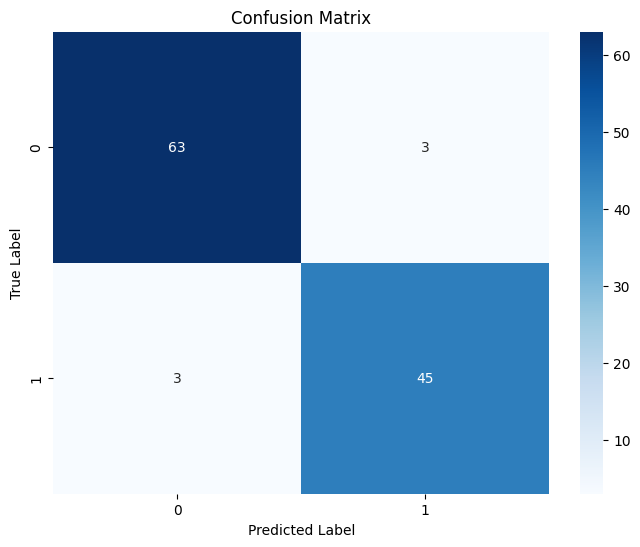

In [20]:
#Question 4: Analyze Confusion Matrix
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Confusion Matrix (Mistake Analysis):")
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()